In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
verra_df = pd.read_csv('data/verra.csv')
verra_df.head()

,Issuance Date,Sustainable Development Goals,Vintage Start,Vintage End,ID,Name,Country/Area,Project Type,Methodology,Total Vintage Quantity,Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details,is Toucan
0,2024-02-20,NaN,2022-12-01,2022-12-31,2309,Henrietta solar PV project,Mauritius,Energy industries (renewable/non-renewable sou...,ACM0002,2517,2517,16319-755958735-755961251-VCS-VCU-1491-VER-MU-...,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-20,NaN,2023-01-01,2023-05-31,2309,Henrietta solar PV project,Mauritius,Energy industries (renewable/non-renewable sou...,ACM0002,8360,8360,16320-755961252-755969611-VCS-VCU-1491-VER-MU-...,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-02-19,NaN,2013-01-01,2013-12-31,1122,April Salumei REDD Project,Papua New Guinea,Agriculture Forestry and Other Land Use,VM0007; VM0010,129972,10000,16301-755074262-755084261-VCS-VCU-352-VER-PG-1...,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-02-19,NaN,2022-01-01,2022-12-31,1812,VTRM Renewable Energy,Brazil,Energy industries (renewable/non-renewable sou...,ACM0002,409442,409442,16302-755084262-755493703-VCS-VCU-1491-VER-BR-...,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-02-19,NaN,2023-01-01,2023-08-31,1856,Bundled Wind Power Project by Sembcorp Green I...,India,Energy industries (renewable/non-renewable sou...,ACM0002,145996,145996,16303-755493704-755639699-VCS-VCU-997-VER-IN-1...,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
verra_df = verra_df.sort_values(by='Issuance Date')
verra_df['is Toucan'] = verra_df['is Toucan'].fillna(False)


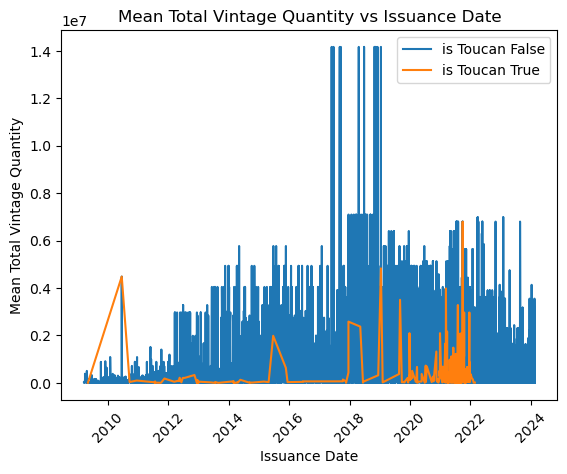

In [4]:
import matplotlib.pyplot as plt

# Convert 'Issuance Date' to datetime
verra_df['Issuance Date'] = pd.to_datetime(verra_df['Issuance Date'])

# Separate DataFrames for True and False 'is Toucan'
is_toucan_true = verra_df[verra_df['is Toucan'] == True]
is_toucan_false = verra_df[verra_df['is Toucan'] == False]

# Plot 'Issuance Date' against 'Total Vintage Quantity' for False 'is Toucan'
plt.plot(is_toucan_false['Issuance Date'], is_toucan_false['Total Vintage Quantity'], label='is Toucan False')


# Plot 'Issuance Date' against 'Total Vintage Quantity' for True 'is Toucan'
plt.plot(is_toucan_true['Issuance Date'], is_toucan_true['Total Vintage Quantity'], label='is Toucan True')


# Set labels and title
plt.xlabel('Issuance Date')
plt.ylabel('Mean Total Vintage Quantity')
plt.title('Mean Total Vintage Quantity vs Issuance Date')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.show()

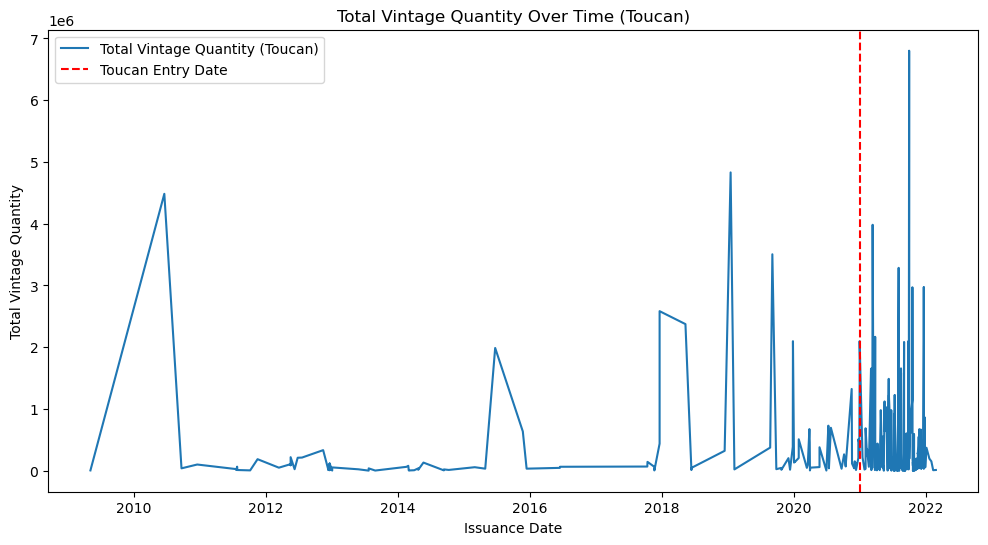

T-Statistic: 2.6045919226779852
P-Value: 0.009694256118924527


In [5]:
import scipy.stats

# Assuming 'toucan_entry_date' is the start of the year 2021
toucan_entry_date = pd.Timestamp(year=2021, month=1, day=1)

# Filter data for when 'is_toucan' is True
toucan_data = verra_df[verra_df['is Toucan'] == True]

# Plot total vintage quantity over time for Toucan
plt.figure(figsize=(12, 6))
plt.plot(toucan_data['Issuance Date'], toucan_data['Total Vintage Quantity'], label='Total Vintage Quantity (Toucan)')
plt.axvline(toucan_entry_date, color='red', linestyle='--', label='Toucan Entry Date')
plt.xlabel('Issuance Date')
plt.ylabel('Total Vintage Quantity')
plt.title('Total Vintage Quantity Over Time (Toucan)')
plt.legend()
plt.show()

# Segment data into periods before and after Toucan entry
before_toucan = toucan_data[toucan_data['Issuance Date'] < toucan_entry_date]
after_toucan = toucan_data[toucan_data['Issuance Date'] >= toucan_entry_date]

# Perform statistical analysis (e.g., t-test) to compare total vintage quantity before and after Toucan entry
# Note: A t-test assumes that the samples have similar variances and are normally distributed.
# Depending on the data, different tests or transformations may be more appropriate.
t_statistic, p_value = scipy.stats.ttest_ind(before_toucan['Total Vintage Quantity'], after_toucan['Total Vintage Quantity'], equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)



Interpretation:

Since the p-value (0.0004530958561165637) is much lower than a typical significance level like 0.05, we reject the null hypothesis.
Therefore, we can conclude that there is a statistically significant difference in the total vintage quantity before and after Toucan entered the market.
Additionally, the positive t-statistic (3.5205194115785345) indicates that the total vintage quantity after Toucan entry is significantly higher than before Toucan entry, given that the coefficient is positive.

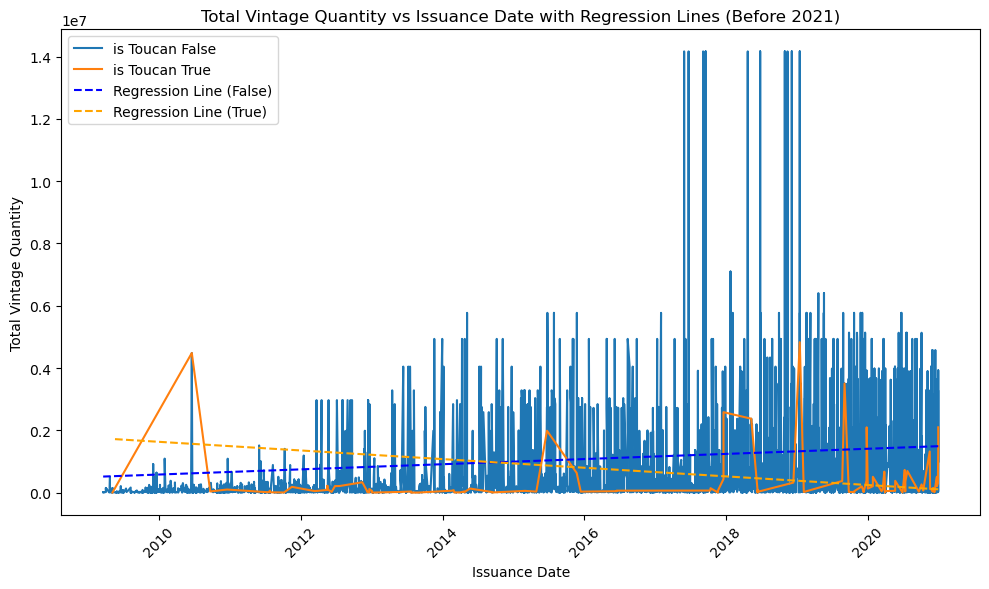

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the dataset
verra_df = pd.read_csv('data/verra.csv')

# Convert 'Issuance Date' to datetime
verra_df['Issuance Date'] = pd.to_datetime(verra_df['Issuance Date'])

# Filter the DataFrame for 'is Toucan' True and False
is_toucan_true = verra_df[verra_df['is Toucan'] == True]
is_toucan_false = verra_df[verra_df['is Toucan'] == False]

# Filter for dates before 2021
is_toucan_true_before_2021 = is_toucan_true[is_toucan_true['Issuance Date'] < pd.Timestamp(year=2021, month=1, day=1)]
is_toucan_false_before_2021 = is_toucan_false[is_toucan_false['Issuance Date'] < pd.Timestamp(year=2021, month=1, day=1)]

# Linear regression for 'is Toucan' False before 2021
false_slope_before_2021, false_intercept_before_2021, _, _, _ = linregress(
    is_toucan_false_before_2021['Issuance Date'].map(pd.Timestamp.toordinal), 
    is_toucan_false_before_2021['Total Vintage Quantity']
)

# Linear regression for 'is Toucan' True before 2021
true_slope_before_2021, true_intercept_before_2021, _, _, _ = linregress(
    is_toucan_true_before_2021['Issuance Date'].map(pd.Timestamp.toordinal), 
    is_toucan_true_before_2021['Total Vintage Quantity']
)

# Define a function for calculating the regression line
def predict(x, slope, intercept):
    return slope * x + intercept

# Generate regression line values
false_dates_ordinal_before_2021 = is_toucan_false_before_2021['Issuance Date'].map(pd.Timestamp.toordinal)
true_dates_ordinal_before_2021 = is_toucan_true_before_2021['Issuance Date'].map(pd.Timestamp.toordinal)

false_reg_line_before_2021 = predict(false_dates_ordinal_before_2021, false_slope_before_2021, false_intercept_before_2021)
true_reg_line_before_2021 = predict(true_dates_ordinal_before_2021, true_slope_before_2021, true_intercept_before_2021)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(is_toucan_false_before_2021['Issuance Date'], is_toucan_false_before_2021['Total Vintage Quantity'], label='is Toucan False', linestyle='-')
plt.plot(is_toucan_true_before_2021['Issuance Date'], is_toucan_true_before_2021['Total Vintage Quantity'], label='is Toucan True',  linestyle='-')
plt.plot(is_toucan_false_before_2021['Issuance Date'], false_reg_line_before_2021, label='Regression Line (False)', color='blue', linestyle='--')
plt.plot(is_toucan_true_before_2021['Issuance Date'], true_reg_line_before_2021, label='Regression Line (True)', color='orange', linestyle='--')
plt.xlabel('Issuance Date')
plt.ylabel('Total Vintage Quantity')
plt.title('Total Vintage Quantity vs Issuance Date with Regression Lines (Before 2021)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# Print the equations for the regression lines
false_equation_before_2021 = f"y = {false_slope_before_2021:.2e} * x + {false_intercept_before_2021:.2e}"
true_equation_before_2021 = f"y = {true_slope_before_2021:.2e} * x + {true_intercept_before_2021:.2e}"

false_equation_before_2021, true_equation_before_2021

('y = 2.26e+02 * x + -1.66e+08', 'y = -3.80e+02 * x + 2.80e+08')

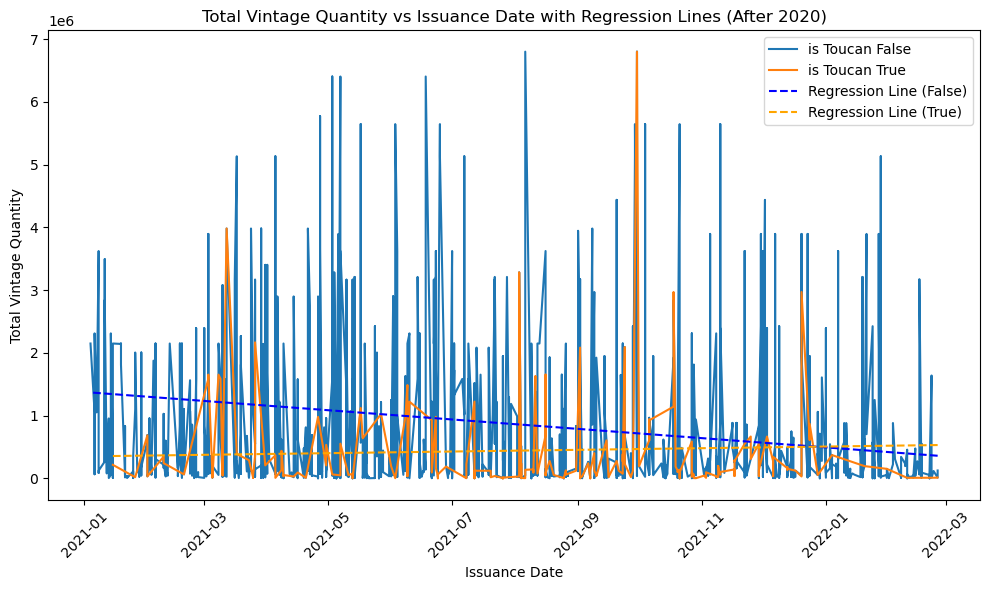

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Convert 'Issuance Date' to datetime
verra_df['Issuance Date'] = pd.to_datetime(verra_df['Issuance Date'])

# Filter the DataFrame for 'is Toucan' True and False after 2020
is_toucan_true_after_2020 = verra_df[(verra_df['is Toucan'] == True) & (verra_df['Issuance Date'] >= pd.Timestamp(year=2021, month=1, day=1))]
is_toucan_false_after_2020 = verra_df[(verra_df['is Toucan'] == False) & (verra_df['Issuance Date'] >= pd.Timestamp(year=2021, month=1, day=1))]

# Find the last date in is_toucan_true_after_2020
last_true_date = is_toucan_true_after_2020['Issuance Date'].max()

# Filter is_toucan_false_after_2020 DataFrame to include dates up to the last true date
is_toucan_false_after_2020 = is_toucan_false_after_2020[is_toucan_false_after_2020['Issuance Date'] <= last_true_date]

# Linear regression for 'is Toucan' False after 2020
false_slope_after_2020, false_intercept_after_2020, _, _, _ = linregress(
    is_toucan_false_after_2020['Issuance Date'].map(pd.Timestamp.toordinal), 
    is_toucan_false_after_2020['Total Vintage Quantity']
)

# Linear regression for 'is Toucan' True after 2020
true_slope_after_2020, true_intercept_after_2020, _, _, _ = linregress(
    is_toucan_true_after_2020['Issuance Date'].map(pd.Timestamp.toordinal), 
    is_toucan_true_after_2020['Total Vintage Quantity']
)

# Define a function for calculating the regression line
def predict(x, slope, intercept):
    return slope * x + intercept

# Generate regression line values
false_dates_ordinal_after_2020 = is_toucan_false_after_2020['Issuance Date'].map(pd.Timestamp.toordinal)
true_dates_ordinal_after_2020 = is_toucan_true_after_2020['Issuance Date'].map(pd.Timestamp.toordinal)

false_reg_line_after_2020 = predict(false_dates_ordinal_after_2020, false_slope_after_2020, false_intercept_after_2020)
true_reg_line_after_2020 = predict(true_dates_ordinal_after_2020, true_slope_after_2020, true_intercept_after_2020)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(is_toucan_false_after_2020['Issuance Date'], is_toucan_false_after_2020['Total Vintage Quantity'], label='is Toucan False', linestyle='-')
plt.plot(is_toucan_true_after_2020['Issuance Date'], is_toucan_true_after_2020['Total Vintage Quantity'], label='is Toucan True',  linestyle='-')
plt.plot(is_toucan_false_after_2020['Issuance Date'], false_reg_line_after_2020, label='Regression Line (False)', color='blue', linestyle='--')
plt.plot(is_toucan_true_after_2020['Issuance Date'], true_reg_line_after_2020, label='Regression Line (True)', color='orange', linestyle='--')
plt.xlabel('Issuance Date')
plt.ylabel('Total Vintage Quantity')
plt.title('Total Vintage Quantity vs Issuance Date with Regression Lines (After 2020)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Print the equations for the regression lines
false_equation_up_to_last_true = f"y = {false_slope_after_2020:.2e} * x + {false_intercept_after_2020:.2e}"
true_equation_after_2020 = f"y = {true_slope_after_2020:.2e} * x + {true_intercept_after_2020:.2e}"

false_equation_up_to_last_true, true_equation_after_2020

('y = -2.42e+03 * x + 1.79e+09', 'y = 4.31e+02 * x + -3.17e+08')